In [1]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
# checking shape of df
df.shape

(907, 27)

we can see there are 907 columns and 25 rows in the dataset

In [6]:
# checking last lines of df
df.tail()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# checking for null values 
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we can see there are large amount of missing values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

as we can see  12 object and 15  column float  data type in this dataset

# we are droping the null values from the dataframe

In [9]:
df.drop(['estimated_generation_gwh','other_fuel1','other_fuel2','wepp_id','other_fuel3'], inplace=True,axis=1)

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [11]:
# removing unwanted columns
df.drop(['gppd_idnr','generation_data_source','owner'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [13]:
df.shape

(907, 19)

we can see now the count of rows and columns has been changed

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [15]:
df['year_of_capacity_data'].nunique()

1

we should also remove this becoz of unique val

In [16]:
df['name'].nunique()

907

there is no use of this column thats why we should remove we will remove it

In [17]:
df.drop(['name','url'],axis=1,inplace=True)

In [18]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [19]:
#fill geolocation_source col with mode of categorical data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [20]:
# removing year_of_capacity_data col 
df.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [21]:
#fill missing values with median in numerical col
df.fillna(df.median()[0],inplace=True)

In [22]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

we can see all null values has been removed

In [23]:
df['source'].nunique()

191

In [24]:
df['geolocation_source'].nunique()

3

In [25]:
df['country'].nunique()

1

In [26]:
df['country_long'].nunique()

1

In [27]:
# removing unwanted 
df.drop(['country','country_long'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


# Data Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

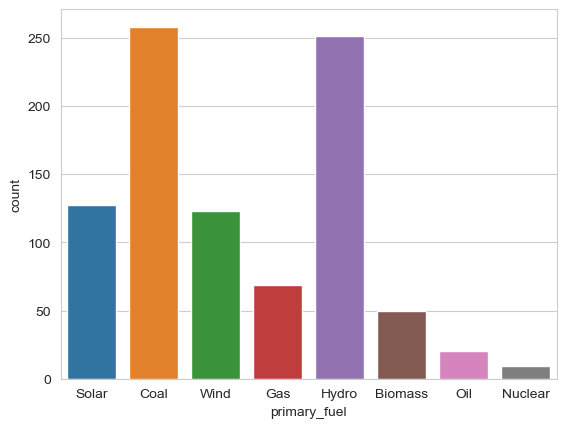

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='primary_fuel',data=df)

# EDA

In [30]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.2,59.200000,59.200,59.200000,59.200000,59.200000,59.2
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,59.2,617.789264,843.747,886.004428,663.774500,626.239128,59.2
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,59.2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,59.2


In [31]:
corr=df.corr()

<AxesSubplot:>

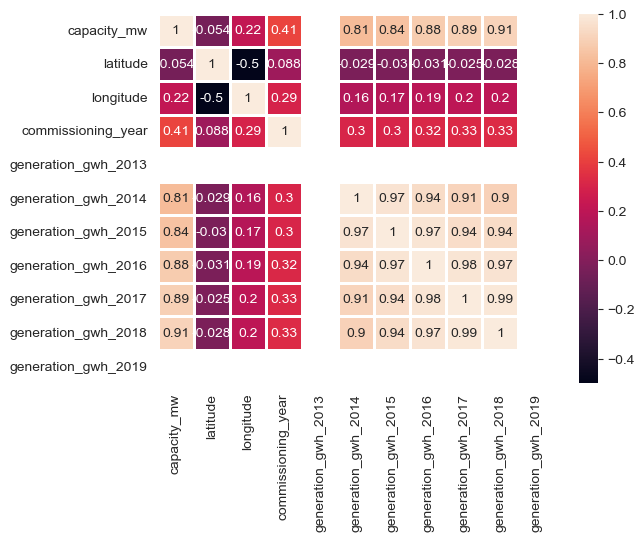

In [32]:
sns.heatmap(corr,annot=True,linewidth=1)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

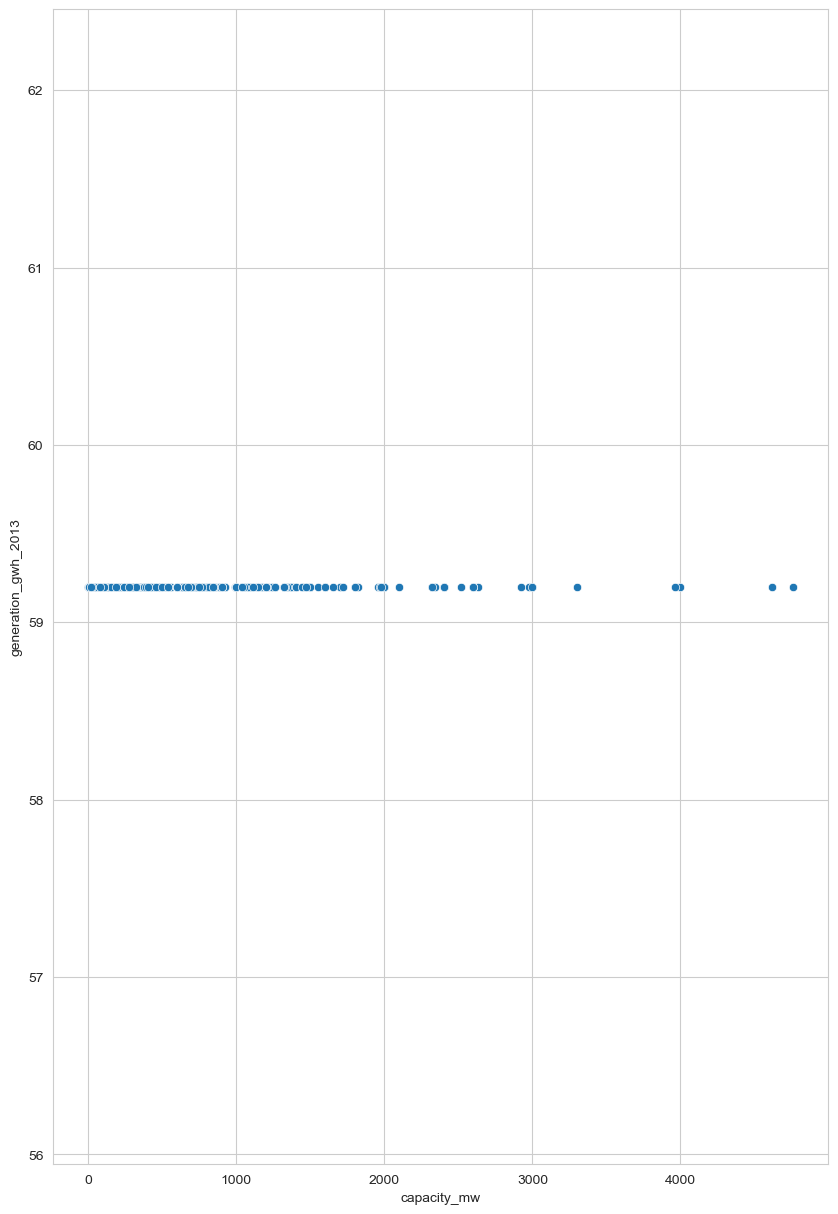

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

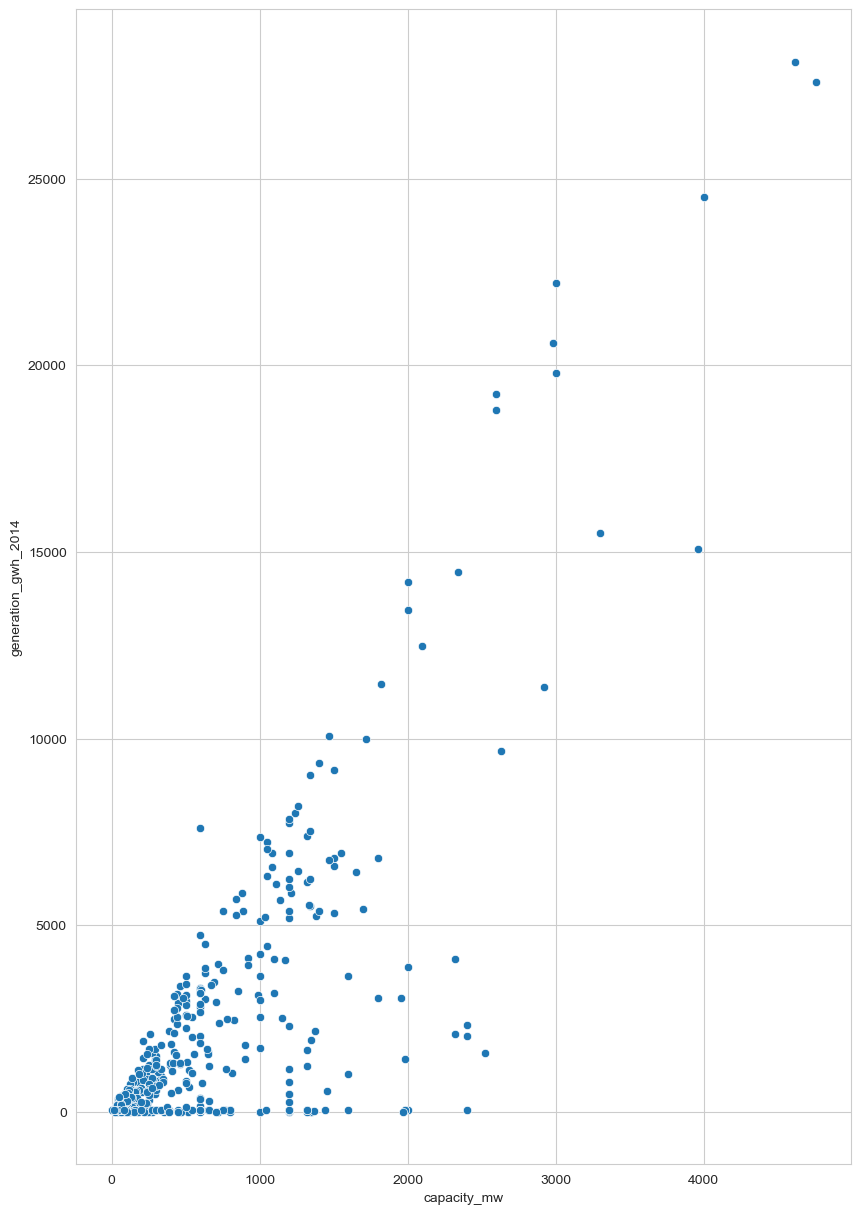

In [34]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

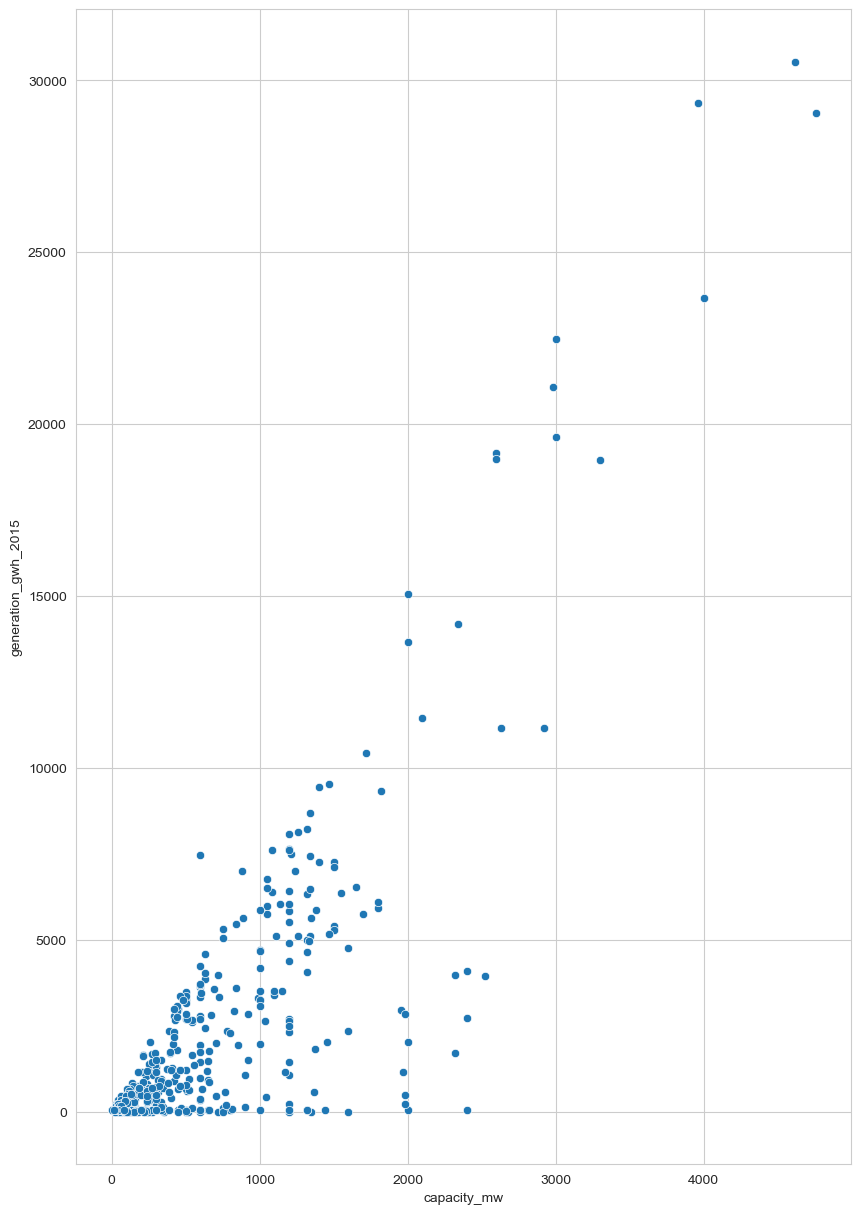

In [35]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

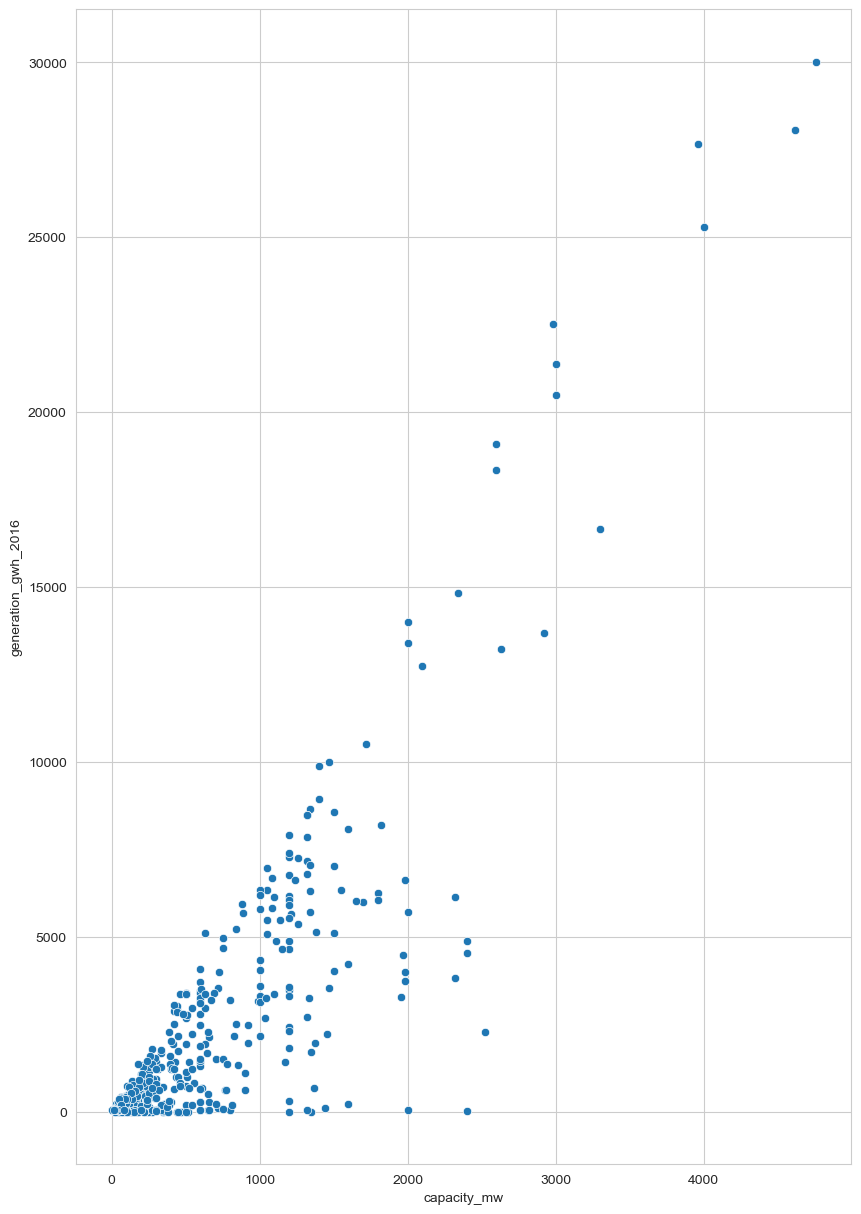

In [36]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

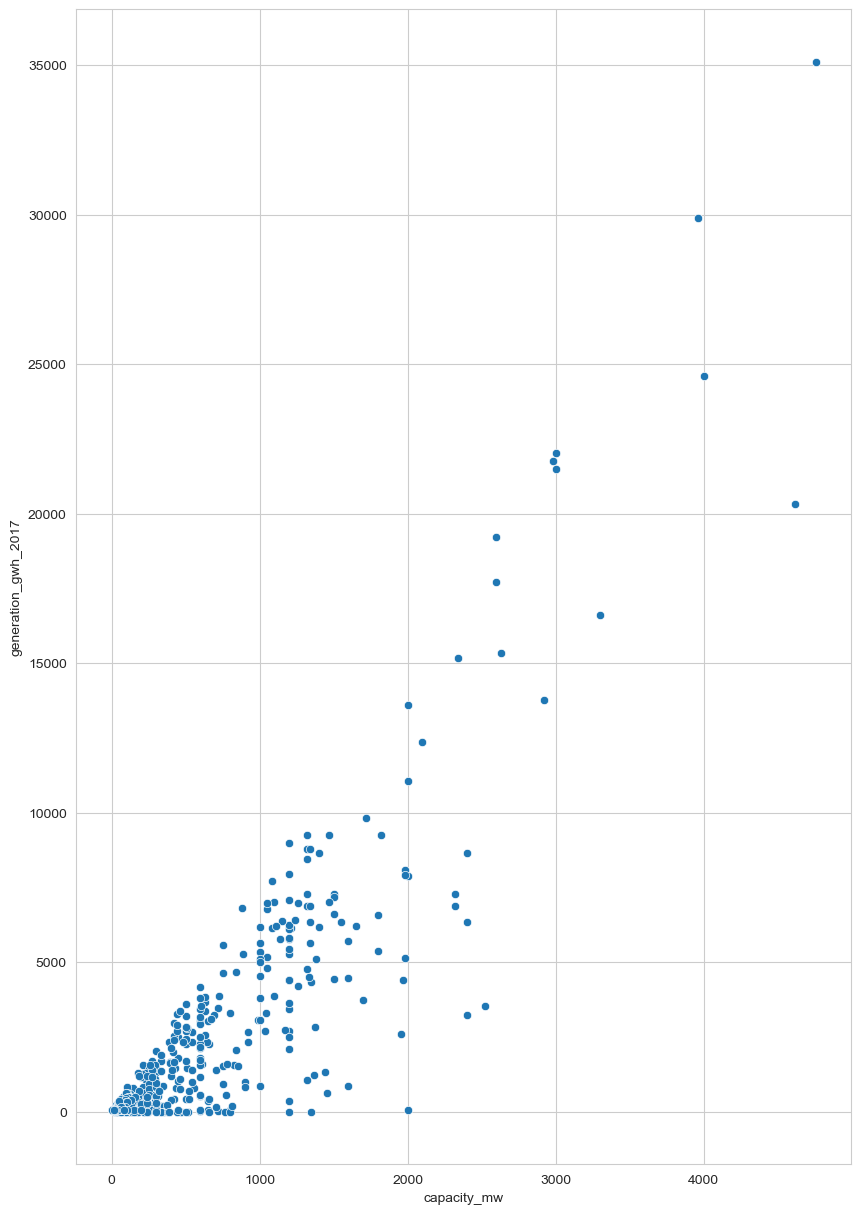

In [37]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

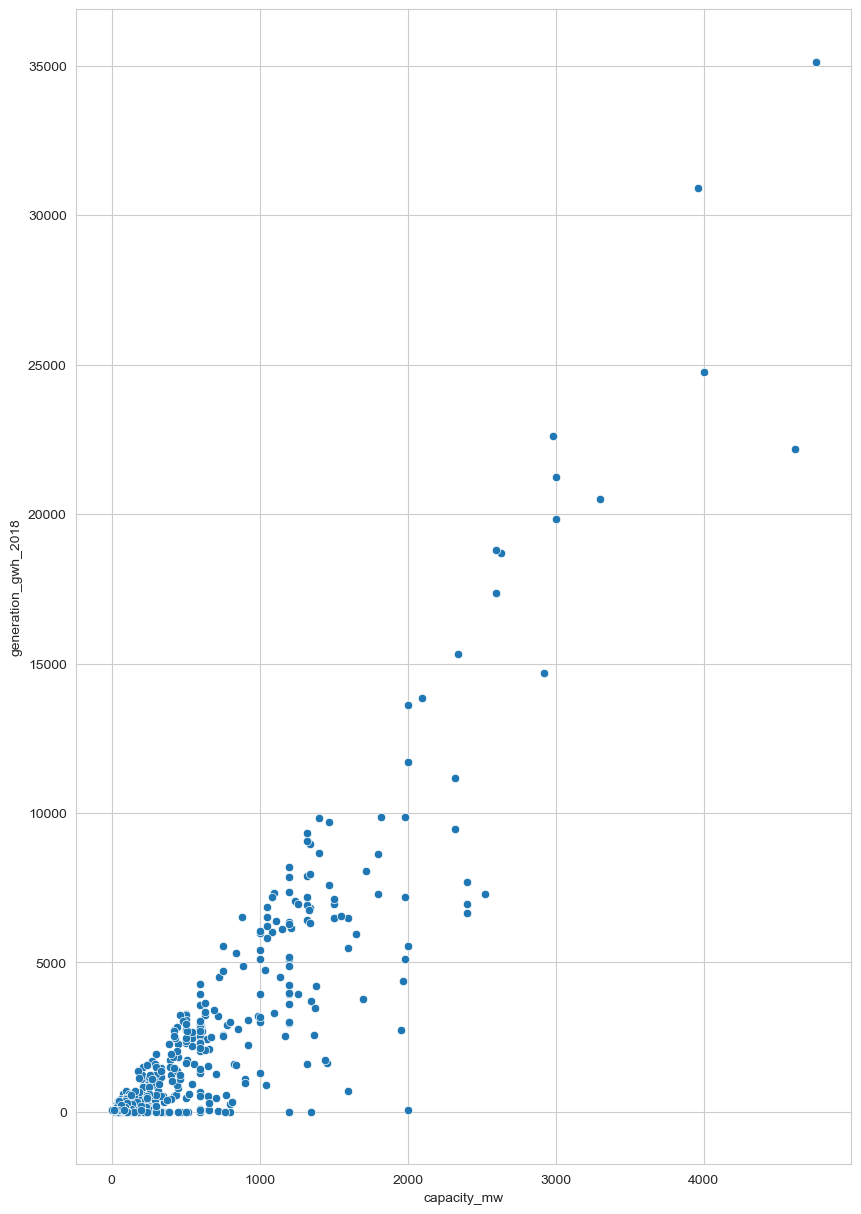

In [38]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2019'>

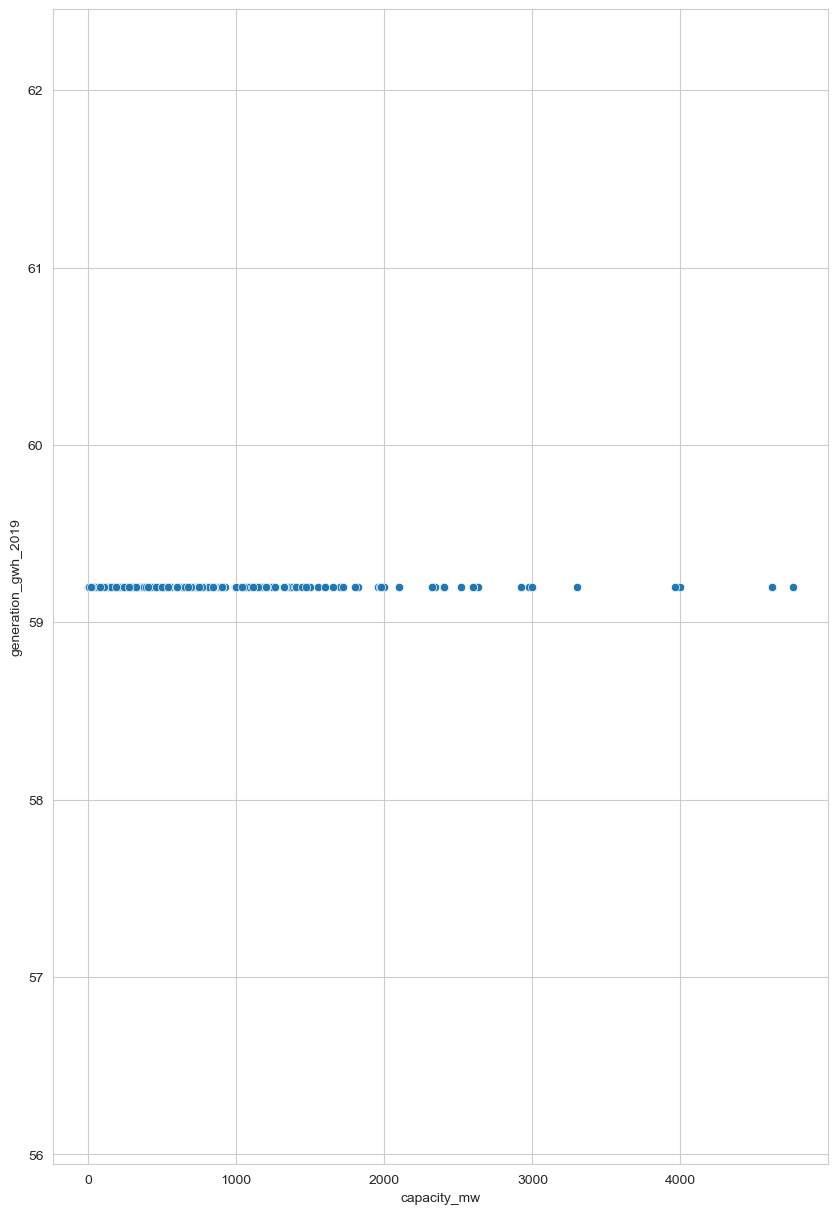

In [39]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2019',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

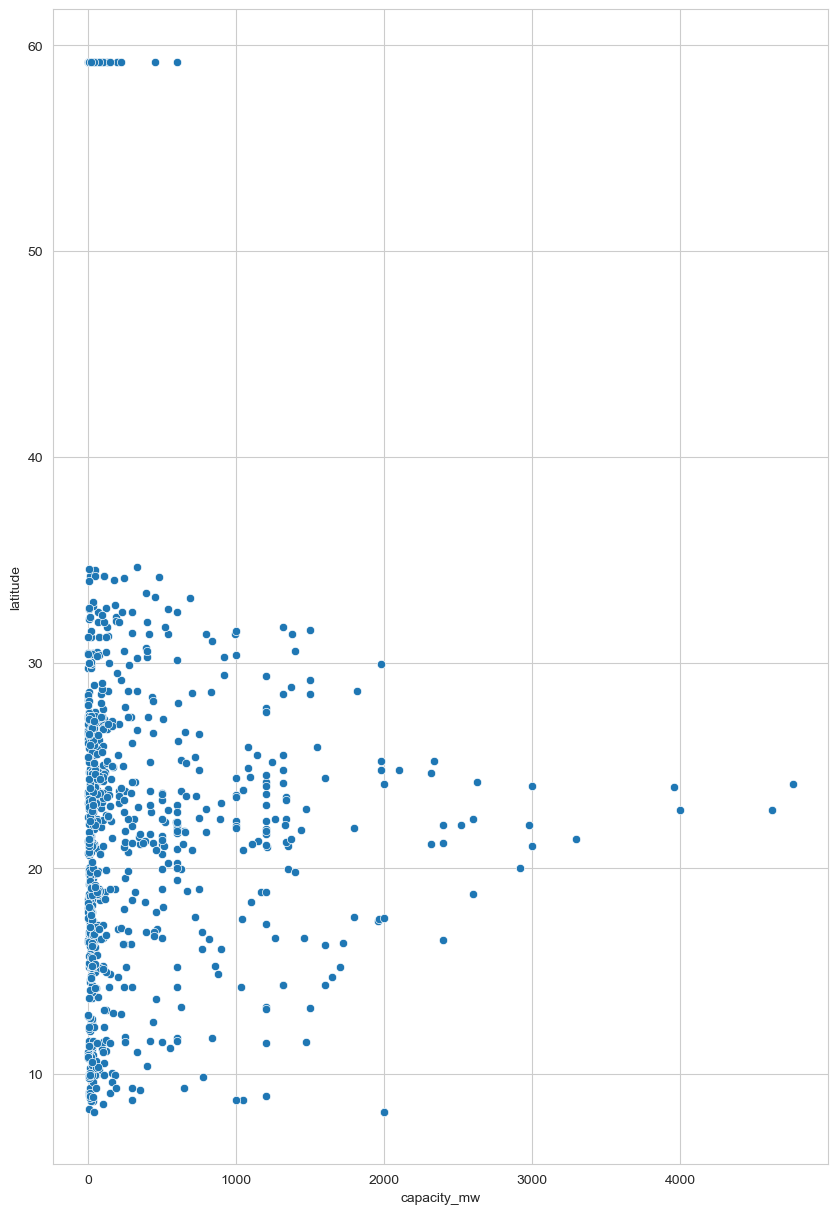

In [40]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

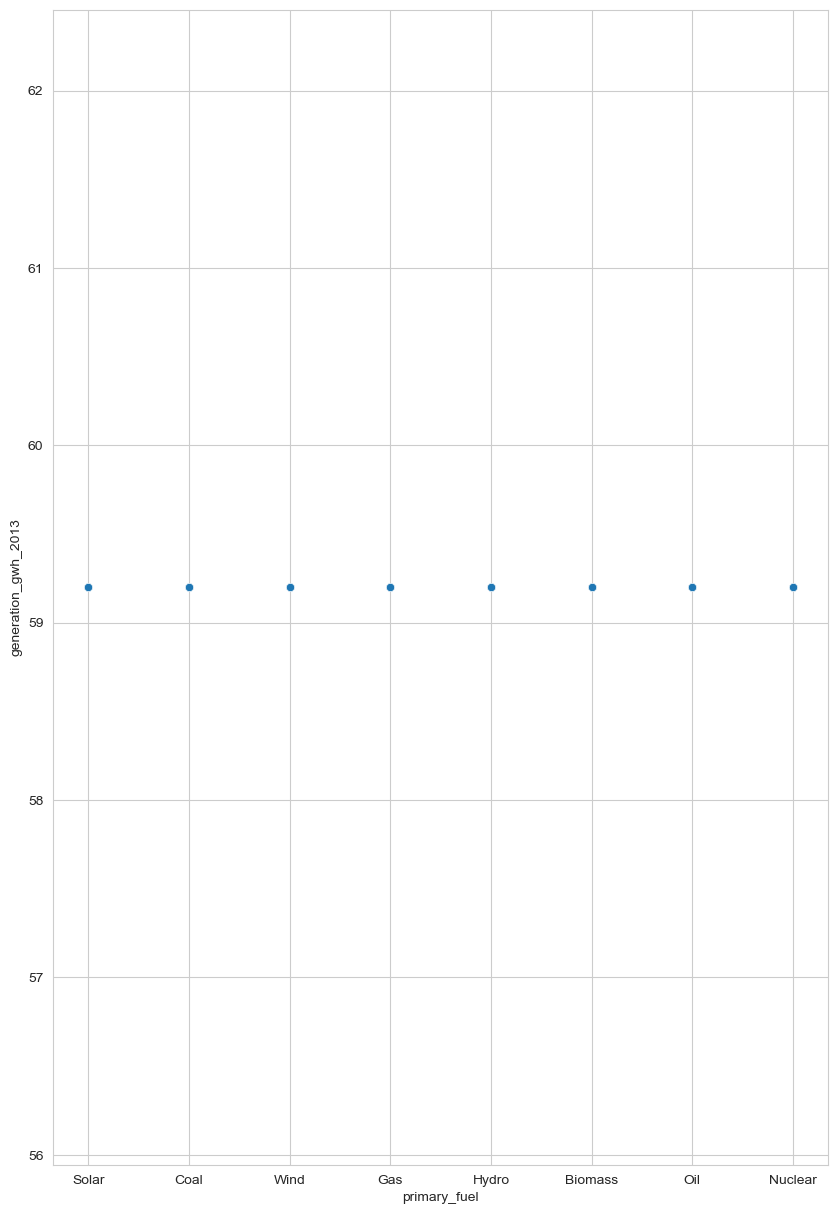

In [41]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

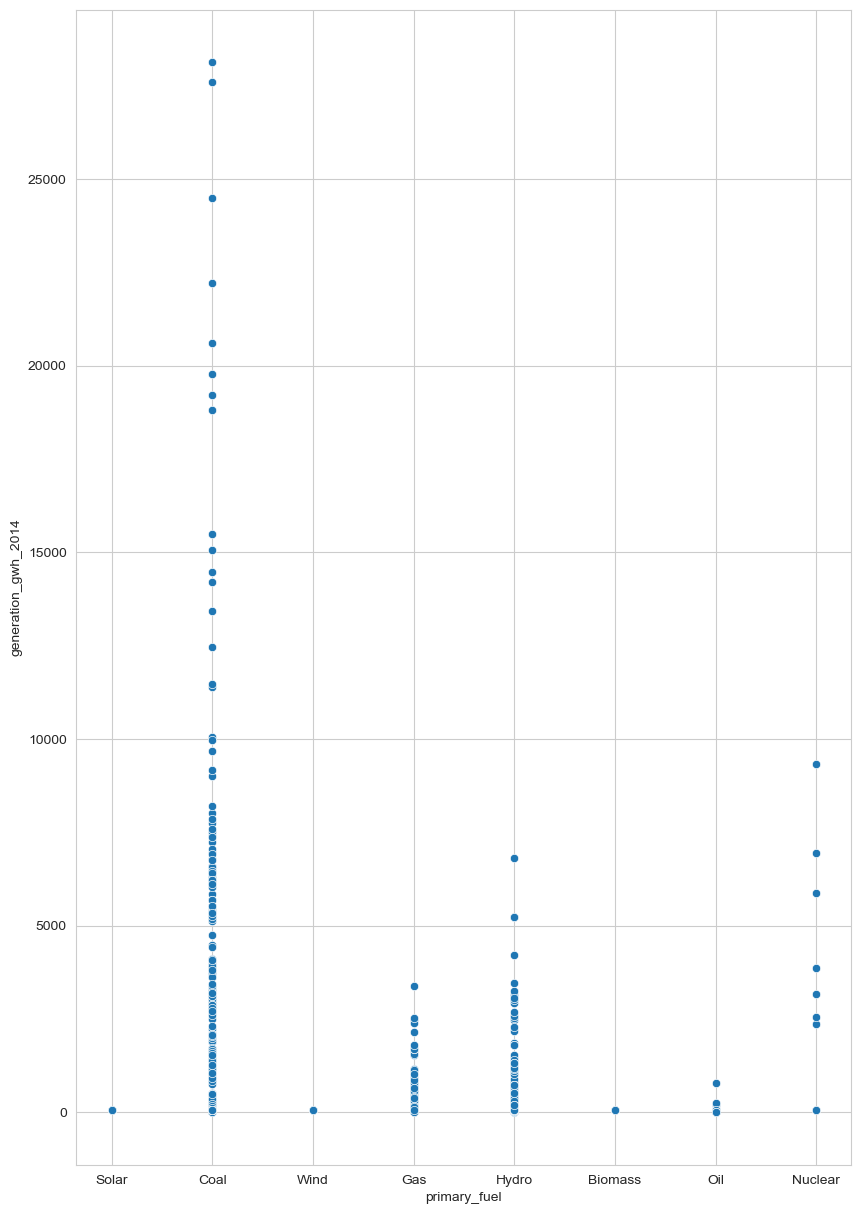

In [42]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

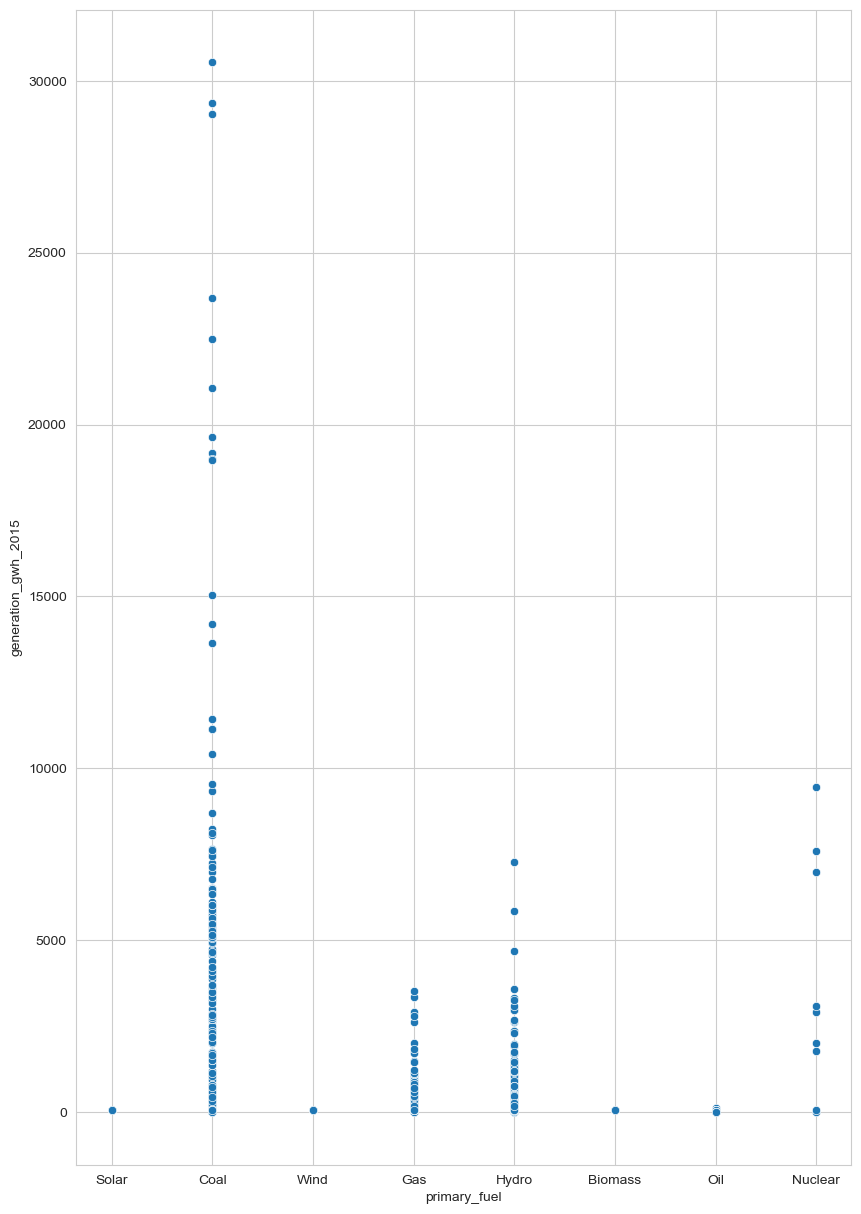

In [43]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

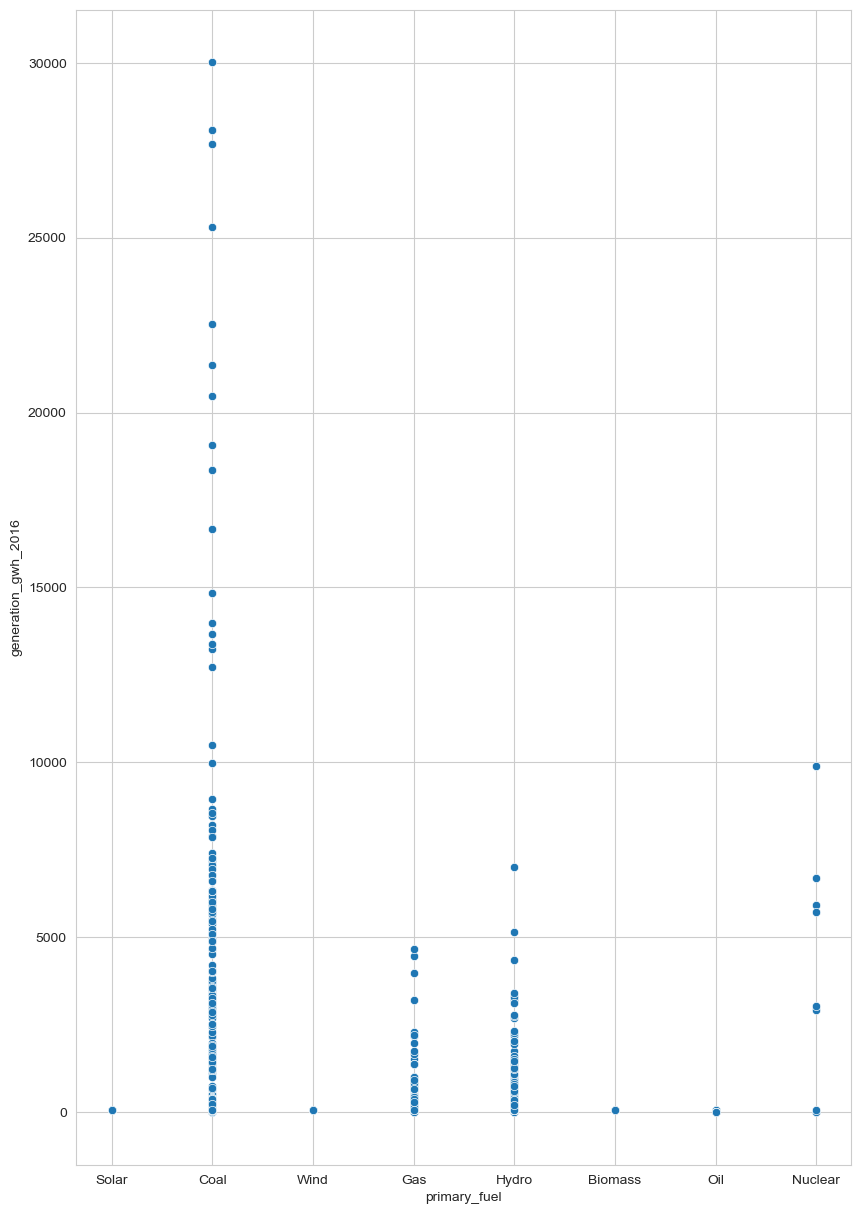

In [44]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

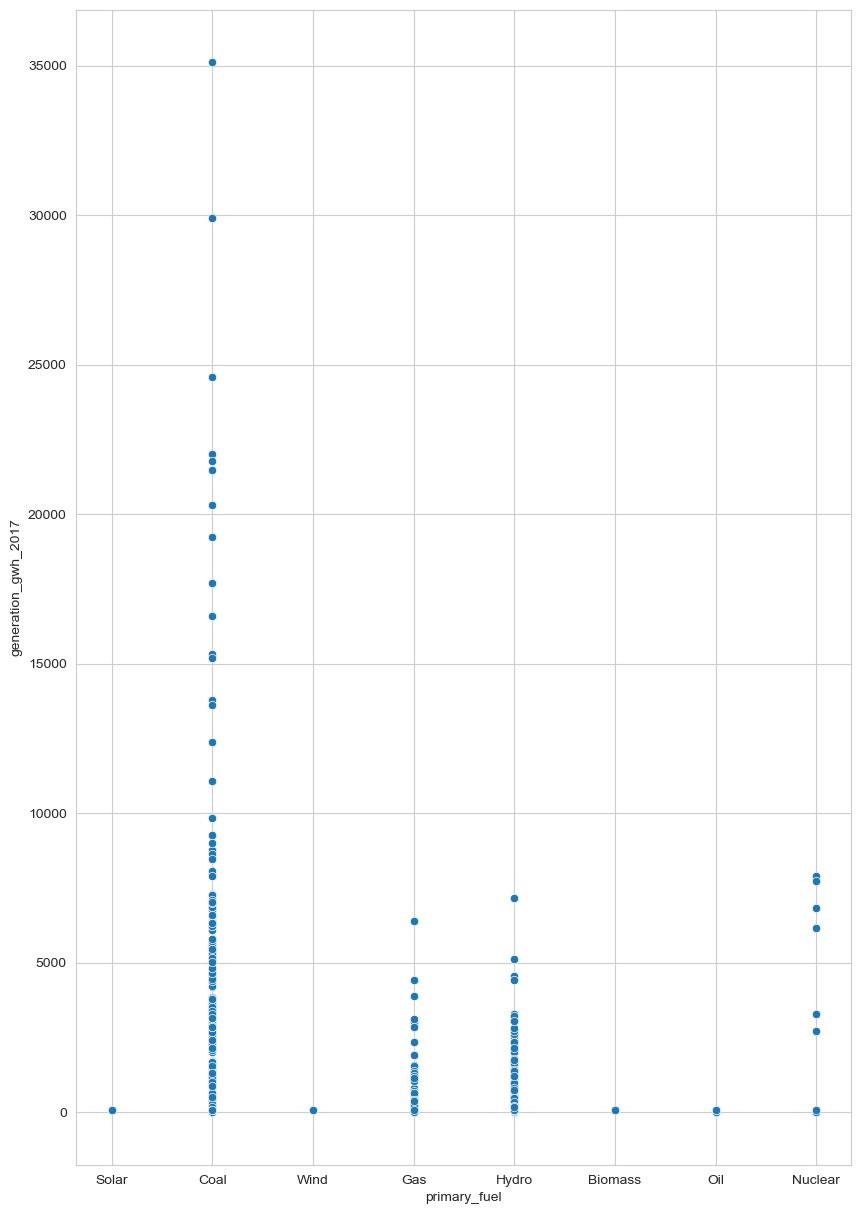

In [45]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

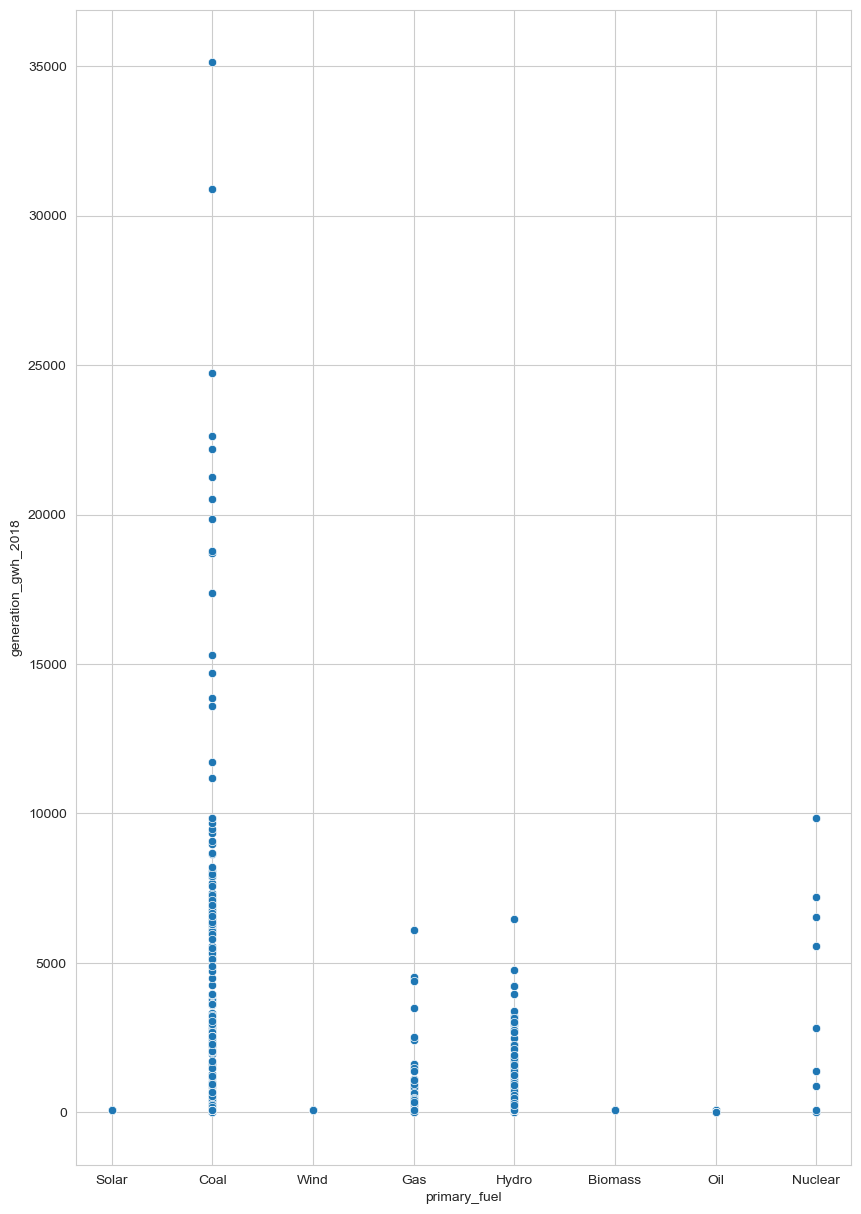

In [46]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2019'>

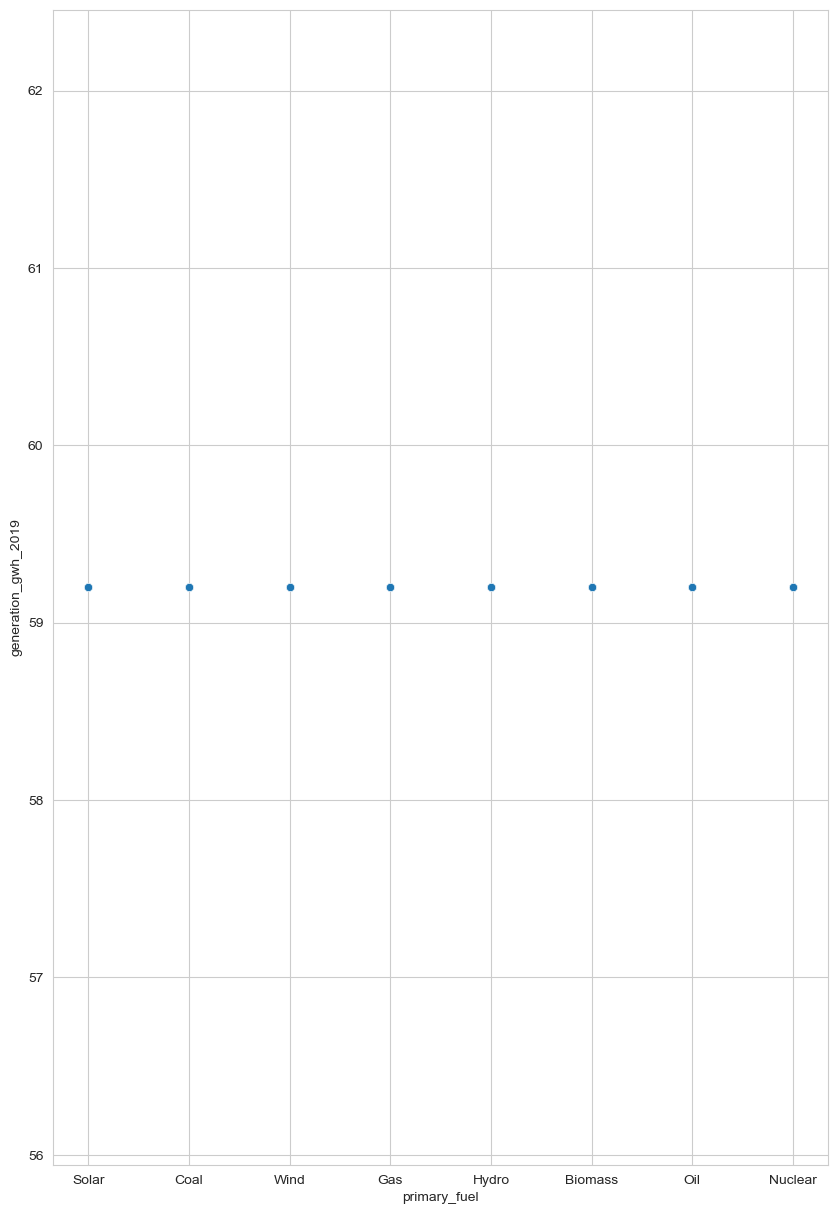

In [47]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2019',data=df)

# with this ploting we  can see from year 2013 to 2019 the coal is most used fuel and  Nuclear , Gas, hydro is used on average basis , and solor ,wind Bosmos and oil was  very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

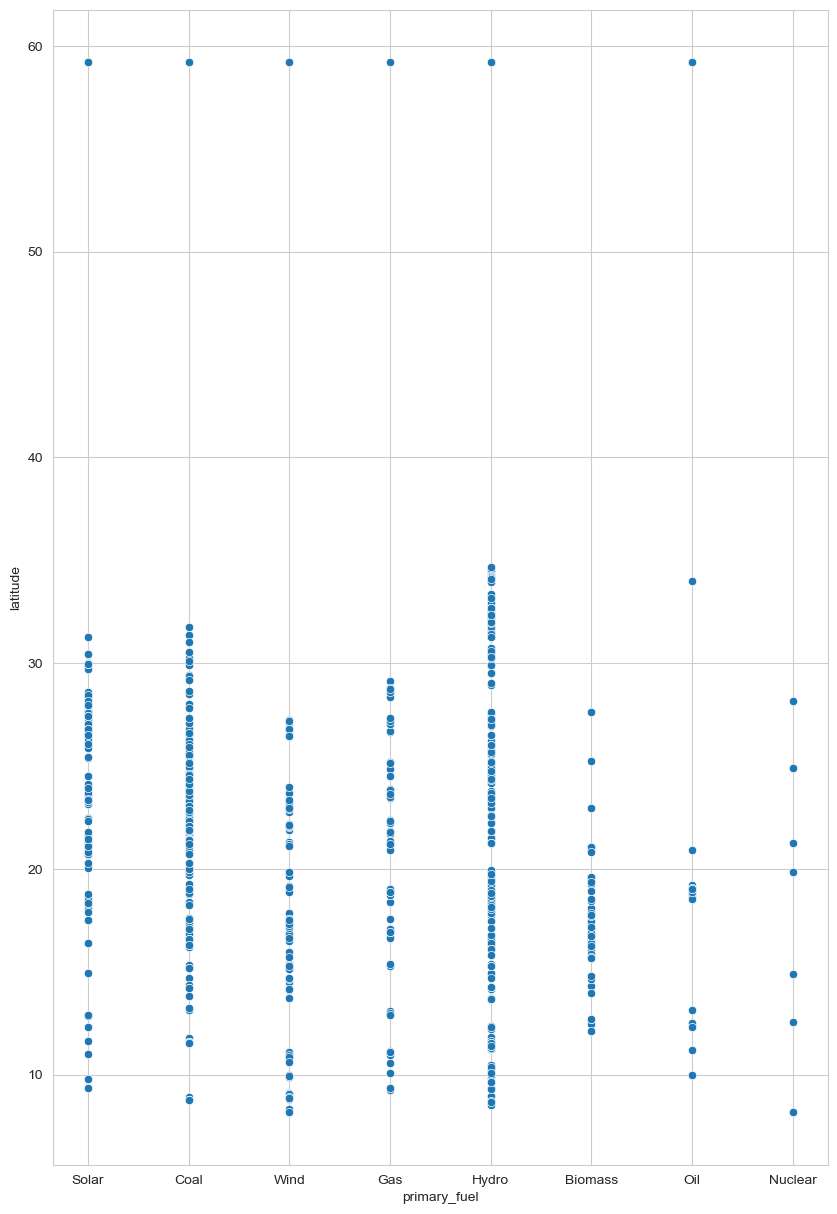

In [48]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

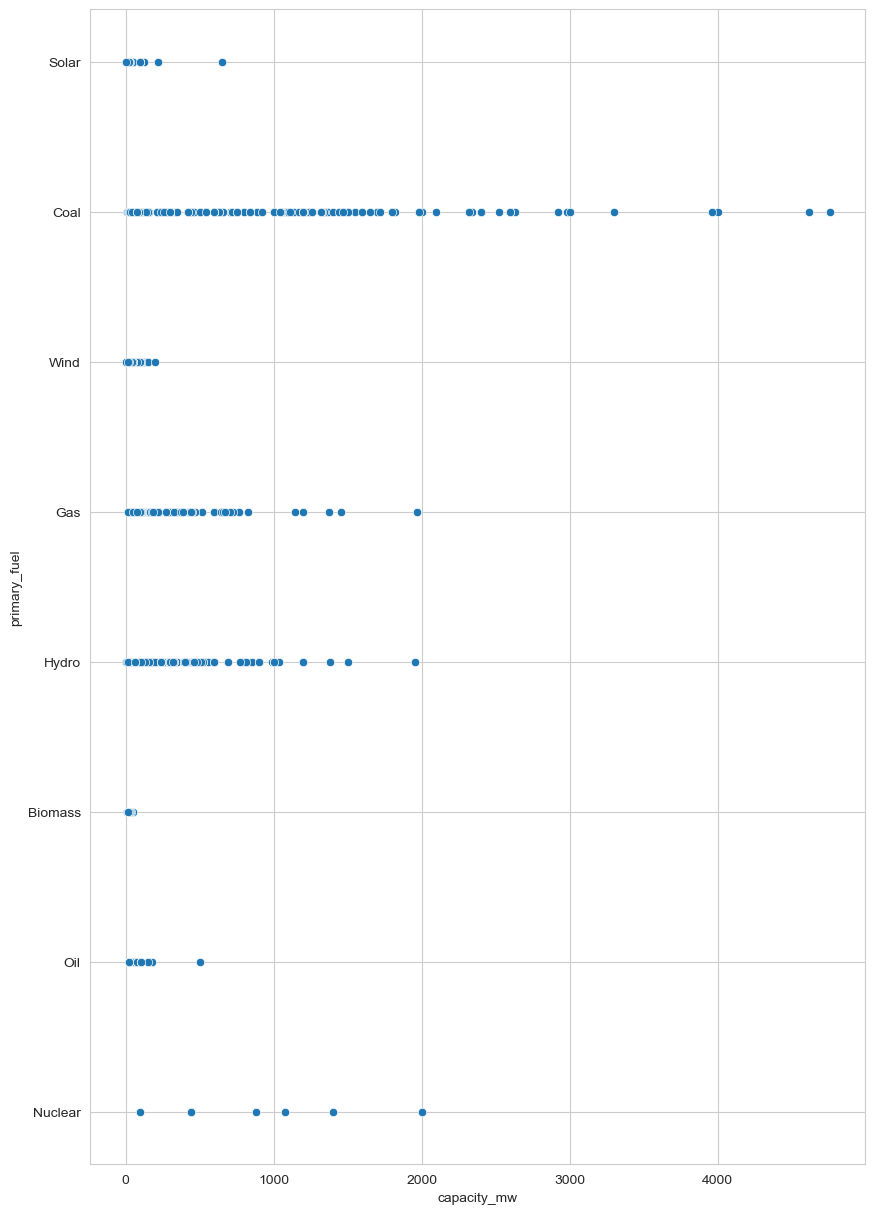

In [49]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

coal is showing maximaum genaration capacity in megawatts

# Converting categorical columns Numerical column

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [54]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [55]:
encoder =  LabelEncoder()
df['primary_fuel']=encoder.fit_transform(df['primary_fuel'])
df['geolocation_source']=encoder.fit_transform(df['geolocation_source'])
df['source']=encoder.fit_transform(df['source'])

In [56]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), int32(3)
memory usage: 88.7 KB


all columns converts into numerical 

# Outlier removal


In [58]:
#zscore
from scipy.stats import zscore
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7, 7, 1, 1, 2, 3, 4, 5, 7, 1, 2, 3,
       4, 5, 7, 7, 1, 2, 3, 4, 5, 7, 7, 5, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3,
       4, 5, 7, 1, 1, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5,
       7, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 7, 7, 1, 2, 3, 4,
       5, 7, 7, 1, 2, 3, 4, 5, 7, 1, 2, 3, 4, 5, 7], dtype=int64))


In [59]:
df.shape

(907, 14)

# Skewness handling

LinAlgError: singular matrix

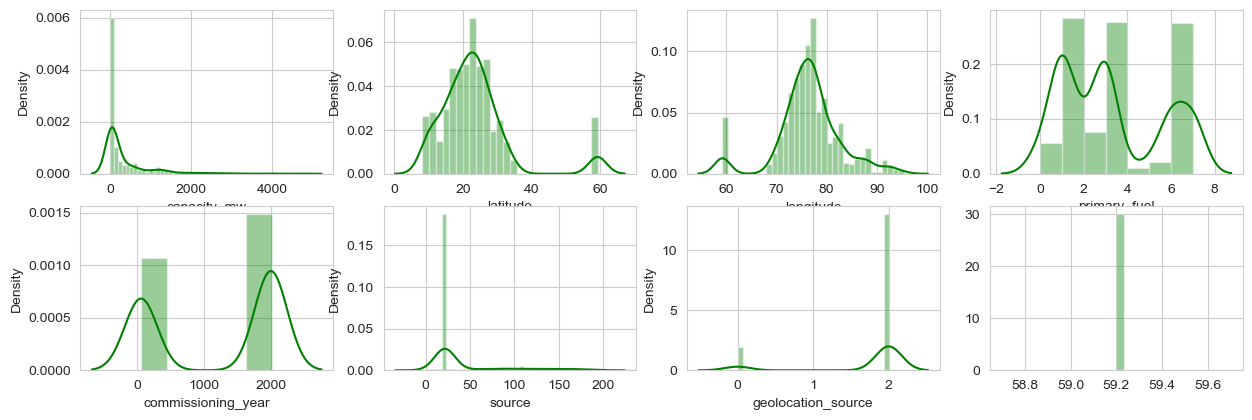

In [60]:
plt.figure(figsize=(15,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [ ]:
df.skew()

skewness more than +/-0.5 will be treated

In [61]:
from sklearn.preprocessing import power_transform
df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','capacity_mw']]=power_transform(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','capacity_mw']])
df.skew()

capacity_mw            0.022164
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2013    0.000000
generation_gwh_2014   -0.025038
generation_gwh_2015   -0.021906
generation_gwh_2016   -0.017326
generation_gwh_2017   -0.010751
generation_gwh_2018   -0.005868
generation_gwh_2019    0.000000
dtype: float64

In [62]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

# First taking 'capacity_mw' as target creating Regression MOdel

# spiliting data as X and Y

In [63]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [64]:
x.shape

(907, 13)

In [65]:
y.shape

(907,)

# Scaling X values

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [67]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [68]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,0.293083,0.478860,0.458025,0.574834,0.230778,0.866593,0.0,0.542321,0.542192,0.541175,0.526855,0.513722,0.0
std,0.202285,0.172999,0.325807,0.488437,0.234962,0.338575,0.0,0.186234,0.187648,0.190836,0.193605,0.198569,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.174464,0.403545,0.142857,0.000000,0.115789,1.000000,0.0,0.453608,0.452026,0.446619,0.430051,0.414312,0.0
50%,0.273817,0.477624,0.428571,0.979579,0.115789,1.000000,0.0,0.453608,0.452026,0.446619,0.430051,0.414312,0.0
75%,0.364187,0.552533,0.857143,0.992342,0.155263,1.000000,0.0,0.668388,0.672023,0.677628,0.664194,0.646477,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# MODEL BUILDING

Linear Regression

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# RENDOM STATE FOR DATA SPLIT

In [70]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random State{i},The Training Accuracy is : {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The Test Accuracy is:{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random State0,The Training Accuracy is : 0.6187352450129536
At random state 0, The Test Accuracy is:0.6643247238849278


At random State1,The Training Accuracy is : 0.6406236801731846
At random state 1, The Test Accuracy is:0.569433717362734


At random State2,The Training Accuracy is : 0.6297739424404973
At random state 2, The Test Accuracy is:0.6082941863618118


At random State3,The Training Accuracy is : 0.626263332715163
At random state 3, The Test Accuracy is:0.6254924421694152


At random State4,The Training Accuracy is : 0.6368492062595167
At random state 4, The Test Accuracy is:0.5780438147347984


At random State5,The Training Accuracy is : 0.6138541131418744
At random state 5, The Test Accuracy is:0.679939515942101


At random State6,The Training Accuracy is : 0.6563505111801731
At random state 6, The Test Accuracy is:0.48697818043933483


At random State7,The Training Accuracy is : 0.6320627604984153
At random state 7, The Test Accuracy is:0.609719324293408


At random S

random state = 96 giving highest accuracy , choosing this as random state

# SPLITTING THE DATA WITH RANDOM STATE = 96

In [71]:
#SPILITTING THE DATA 73% TRAINING  AND 27% FOR TESTING
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=96)

In [72]:
x_train.shape

(662, 13)

In [73]:
x_test.shape

(245, 13)

In [74]:
y_test.shape

(245,)

In [75]:
y_test.shape

(245,)

In [76]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.6058719033781397


In [77]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('R2_score:',r2_score(LR_predict,y_test))

MSE: 0.3284477069084507
MAE: 0.45905120659377824
R2_score: 0.5010903411209127


# RIDGE

In [78]:
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.6055298359023686


In [79]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('R2_score:',r2_score(R_predict,y_test))

MSE: 0.3262214094829957
MAE: 0.4590771596829672
R2_score: 0.49759375398831573


# SVR

In [80]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5638667254879166


In [81]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('R2_score:',r2_score(svr_predict,y_test))

MSE: 0.33394530336050204
MAE: 0.4202698419499841
R2_score: 0.597512154212525


# SVR (kernel='poly')

In [82]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.5638667254879166


In [83]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('R2_score:',r2_score(svrpred_p,y_test))

MSE: 0.20204430432253864
MAE: 0.3223042444979056
R2_score: 0.7740964961447754


# kernel='rbf'

In [84]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7896019935771974


In [85]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('R2_score:',r2_score(svrpred_r,y_test))

MSE: 0.1935917995137735
MAE: 0.3150165817347753
R2_score: 0.7729598332148993


# Random Forest Regressor


In [86]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.968615920761919


In [87]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('R2_score:',r2_score(RF_PRED,y_test))

MSE: 0.16922592408120085
MAE: 0.2827513165344627
R2_score: 0.8242581285271893


# DecisionTreeRegressor


In [87]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9926947715223814


In [88]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('R2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.24696517128019993
MAE: 0.3427055971063221
R2_score: 0.7650159887744077


# GradientBoostingRegressor


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test) 

0.8955473936139743


In [90]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('R2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.17033311009948227
MAE: 0.2900013066911483
R2_score: 0.8130009991148326


# Cross validation

In [91]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse=-(cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10))
    return(rmse)


models=[LinearRegression(),
       Ridge(),
       SVR(kernel='linear'),
       SVR(kernel='poly'),
       SVR(kernel='rbf'),
       RandomForestRegressor(),
       DecisionTreeRegressor(),
       GradientBoostingRegressor(),]




names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']
for model, name in zip (models,names):
    score = rmse_cv(model,x,y)
    print('{}   : {:.6f},{:4f}'.format(name,score.mean(),score.std()))

LR   : 0.386910,0.060358
R   : 0.384276,0.060523
svr   : 0.449971,0.072173
svr_p   : 0.224859,0.051773
svr_r   : 0.225138,0.054346
RF   : 0.197115,0.055234
DTR   : 0.311004,0.066068
GBR   : 0.187769,0.053357


# HYPER PARAMETER TUNING



# Grid Search CV

In [92]:
from sklearn.model_selection import GridSearchCV

# With Gradient Boosting Regressor

In [93]:
GF=GradientBoostingRegressor()
param={'criterion':['mse','mae'],
      'n_estimators':[100, 200],
      }

In [94]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [95]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [96]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [97]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('R2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.16585712285204995
MAE: 0.2842247118279596
R2_score: 0.8280332136270621


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

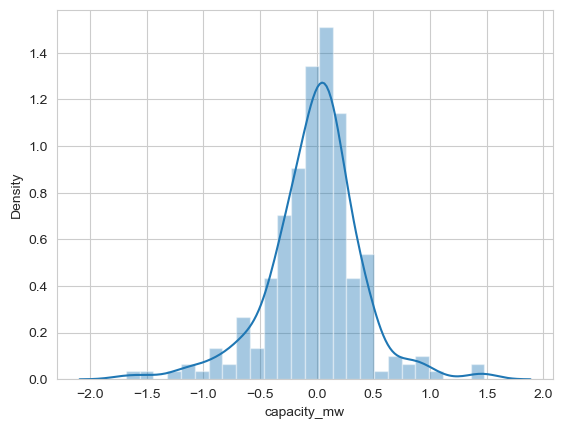

In [98]:
sns.distplot(GF_grid_pred-y_test)

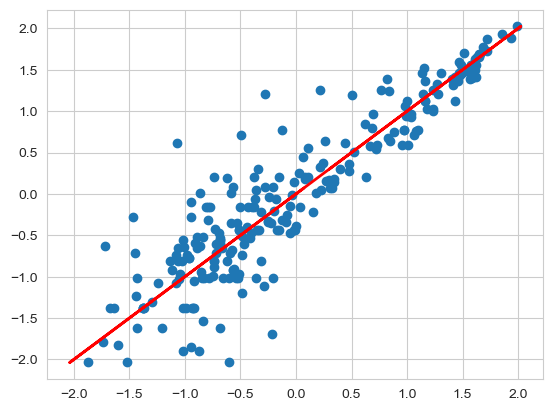

In [99]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Choosing GradientBoostingRegressor as the best model


# saving the  model

In [100]:
import  joblib

In [101]:
joblib.dump(GF_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']

# Taking 'primary_fuel' As target creating classification model

# Dividing Data into X and Y

In [102]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [103]:
x.shape

(907, 13)

In [104]:
y.shape

(907,)

# spliting Train and Test data 

In [122]:
 from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.27,random_state=42)

In [174]:
x_train.shape

(662, 13)

In [175]:
x_test.shape

(245, 13)

In [176]:
y_train.shape

(662,)

In [177]:
y_test.shape

(245,)

# Model Building

In [178]:
#importing necessory libraries
from sklearn.linear_model import LogisticRegression

In [179]:
lr=LogisticRegression()
lr_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')
print('cross validation score:',  np.mean(lr_score))

cross validation score: 0.5457288567785805


In [180]:
lr.fit(x_train,y_train)
LR_predicted=lr.predict(x_test)
print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print('Training accuracy::',lr.score(x_train,y_train))
print('Test accuracy::',lr.score(x_test,y_test))


0.5428571428571428
[[ 0  0  0  0  0  0  6  2]
 [ 0 15  0 32  0  0 16  2]
 [ 0  8  0 10  0  0  3  2]
 [ 0 13  0 64  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  7  0  0  1  0]
 [ 1  4  0  0  0  0 16  2]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      0.23      0.29        65
           2       0.00      0.00      0.00        23
           3       0.55      0.83      0.66        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       0.38      0.70      0.49        23
           7       0.83      1.00      0.90        38

    accuracy                           0.54       245
   macro avg       0.27      0.34      0.29       245
weighted avg       0.44      0.54      0.47       245

Training accuracy:: 0.552870090634441
Test accuracy:: 0.5428571428571428


In [181]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Decision Tree Classifier

In [191]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print('cross validation score for dtc:',np.mean(dtc_score))

cross validation score for dtc: 0.8070183959686721


In [183]:
dtc.fit(x_train,y_train)
dtc_predicted=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_predicted))
print(confusion_matrix(y_test,dtc_predicted))
print(classification_report(y_test,dtc_predicted))
print('Training accuracy::',dtc.score(x_train,y_train))
print('Test accuracy::',dtc.score(x_test,y_test))

0.7918367346938775
[[ 6  2  0  0  0  0  0  0]
 [ 2 47 11  2  2  1  0  0]
 [ 0  8  8  4  0  3  0  0]
 [ 0  6  1 70  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  1  1  3  0  0]
 [ 0  1  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.69      0.72      0.71        65
           2       0.36      0.35      0.36        23
           3       0.91      0.91      0.91        77
           4       0.00      0.00      0.00         3
           5       0.43      0.38      0.40         8
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        38

    accuracy                           0.79       245
   macro avg       0.64      0.63      0.64       245
weighted avg       0.79      0.79      0.79       245

Training accuracy:: 1.0
Test accuracy:: 0.7918367346938775


# KNeighborsClassifier

In [185]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('cross validation score for knn:',np.mean(knn_score))

cross validation score for knn: 0.743051423714407


In [186]:
knn.fit(x_train,y_train)
knn_predicted=knn.predict(x_test)
print(accuracy_score(y_test,knn_predicted))
print(confusion_matrix(y_test,knn_predicted))
print(classification_report(y_test,knn_predicted))
print('Training accuracy::',knn.score(x_train,y_train))
print('Test accuracy::',knn.score(x_test,y_test))

0.746938775510204
[[ 3  1  0  0  0  0  3  1]
 [ 3 48  4  3  0  0  6  1]
 [ 3  4  9  5  0  0  0  2]
 [ 0  5  2 70  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  1  6  0  0  0  0]
 [ 4  4  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.23      0.38      0.29         8
           1       0.75      0.74      0.74        65
           2       0.53      0.39      0.45        23
           3       0.82      0.91      0.86        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       0.62      0.65      0.64        23
           7       0.90      1.00      0.95        38

    accuracy                           0.75       245
   macro avg       0.48      0.51      0.49       245
weighted avg       0.71      0.75      0.73       245

Training accuracy:: 0.8308157099697885
Test accuracy:: 0.746938775510204


# RandomForestClassifier

In [192]:
RFC=RandomForestClassifier()
RFC_score=cross_val_score(RFC,x,y,cv=5,scoring='accuracy')
print('cross validation score for RFC:',np.mean(RFC_score))

cross validation score for RFC: 0.856711796490802


In [198]:
RFC.fit(x_train,y_train)
RFC_predicted=RFC.predict(x_test)
print(accuracy_score(y_test,RFC_predicted))
print(confusion_matrix(y_test,RFC_predicted))
print(classification_report(y_test,RFC_predicted))
print('Training accuracy::',RFC.score(x_train,y_train))
print('Test accuracy::',RFC.score(x_test,y_test))

0.8244897959183674
[[ 5  2  0  0  0  0  0  1]
 [ 3 55  5  2  0  0  0  0]
 [ 0 10  5  5  0  3  0  0]
 [ 0  3  0 74  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  4  1  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.75      0.85      0.80        65
           2       0.33      0.22      0.26        23
           3       0.90      0.96      0.93        77
           4       0.00      0.00      0.00         3
           5       0.40      0.25      0.31         8
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        38

    accuracy                           0.82       245
   macro avg       0.62      0.61      0.61       245
weighted avg       0.79      0.82      0.81       245

Training accuracy:: 1.0
Test accuracy:: 0.8244897959183674


# ENSEMBLE TECHNIQUES



# 1.ADA BOOST CLASSIFIER

In [199]:
ADB=AdaBoostClassifier()
ADB_score=cross_val_score(ADB,x,y,cv=10,scoring='accuracy')
print('cross validation score for Ada Boost:',np.mean(ADB_score))

cross validation score for Ada Boost: 0.5425518925518926


In [200]:
ADB.fit(x_train,y_train)
ADB_predicted=ADB.predict(x_test)
print(accuracy_score(y_test,ADB_predicted))
print(confusion_matrix(y_test,ADB_predicted))
print(classification_report(y_test,ADB_predicted))
print('Training accuracy::',ADB.score(x_train,y_train))
print('Test accuracy::',ADB.score(x_test,y_test))

0.3673469387755102
[[ 0  8  0  0  0  0  0  0]
 [ 0 63  0  2  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0 71  0  6  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  6  0  2  0  0  0  0]
 [ 0  0  0  2  0  0 21  0]
 [ 0 38  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.30      0.97      0.45        65
           2       0.00      0.00      0.00        23
           3       0.50      0.08      0.13        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       1.00      0.91      0.95        23
           7       0.00      0.00      0.00        38

    accuracy                           0.37       245
   macro avg       0.22      0.25      0.19       245
weighted avg       0.33      0.37      0.25       245

Training accuracy:: 0.4561933534743202
Test accuracy:: 0.3673469387755102


# BAGGING CLASSIFIER

In [201]:
BGC=BaggingClassifier()
BGC_score=cross_val_score(BGC,x,y,cv=10,scoring='accuracy')
print('cross validation score for Bagging Classifier :',np.mean(BGC_score))

cross validation score for Bagging Classifier : 0.8511355311355311


In [202]:
BGC.fit(x_train,y_train)
BGC_predicted=BGC.predict(x_test)
print(accuracy_score(y_test,BGC_predicted))
print(confusion_matrix(y_test,BGC_predicted))
print(classification_report(y_test,BGC_predicted))
print('Training accuracy::',BGC.score(x_train,y_train))
print('Test accuracy::',BGC.score(x_test,y_test))

0.8530612244897959
[[ 6  2  0  0  0  0  0  0]
 [ 4 56  4  1  0  0  0  0]
 [ 0  7 11  3  0  2  0  0]
 [ 0  3  1 73  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  4  1  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.78      0.86      0.82        65
           2       0.55      0.48      0.51        23
           3       0.94      0.95      0.94        77
           4       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        38

    accuracy                           0.85       245
   macro avg       0.67      0.66      0.66       245
weighted avg       0.84      0.85      0.84       245

Training accuracy:: 0.9954682779456193
Test accuracy:: 0.8530612244897959


# Gradient Boosting Classifier

In [203]:
GBC=GradientBoostingClassifier()
GBC_score=cross_val_score(GBC,x,y,cv=10,scoring='accuracy')
print('cross validation score for Gradient Boosting  Classifier :',np.mean(BGC_score))

cross validation score for Gradient Boosting  Classifier : 0.8511355311355311


In [204]:
GBC.fit(x_train,y_train)
GBC_predicted=GBC.predict(x_test)
print(accuracy_score(y_test,GBC_predicted))
print(confusion_matrix(y_test,GBC_predicted))
print(classification_report(y_test,GBC_predicted))
print('Training accuracy::',GBC.score(x_train,y_train))
print('Test accuracy::',GBC.score(x_test,y_test))

0.8204081632653061
[[ 5  3  0  0  0  0  0  0]
 [ 2 55  4  4  0  0  0  0]
 [ 1  6  9  4  0  3  0  0]
 [ 0  7  1 69  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  2  1  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.73      0.85      0.79        65
           2       0.56      0.39      0.46        23
           3       0.87      0.90      0.88        77
           4       0.00      0.00      0.00         3
           5       0.40      0.25      0.31         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        38

    accuracy                           0.82       245
   macro avg       0.65      0.63      0.63       245
weighted avg       0.80      0.82      0.81       245

Training accuracy:: 1.0
Test accuracy:: 0.8204081632653061


RandomforestClassifier as final model for HYPER PARAMETER TUNING

# HYPER PARAMETER TUNING

In [236]:
rfc=RandomForestClassifier()
param_grid={'criterion':['gini'],'n_estimators':[200,50],'min_samples_split':[2,3],'random_state':[10]}

In [237]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [238]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print('Accuracy after parameter tuning : ',accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Accuracy after parameter tuning :  0.8285714285714286


In [239]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

# Model training with best parameters

In [241]:
best_param={'criterion':['gini'],'n_estimators':[200],'min_samples_split':[2],'random_state':[10]}

In [243]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print('Accuracy after parameter tuning : ',accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning :  0.8285714285714286


# Report of RandomForestClassifier 

In [245]:
print('CLASSIFICATION REPORT:\n',classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.79      0.83      0.81        65
           2       0.50      0.35      0.41        23
           3       0.86      0.95      0.90        77
           4       0.00      0.00      0.00         3
           5       0.40      0.25      0.31         8
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        38

    accuracy                           0.83       245
   macro avg       0.64      0.63      0.63       245
weighted avg       0.80      0.83      0.81       245



<AxesSubplot:>

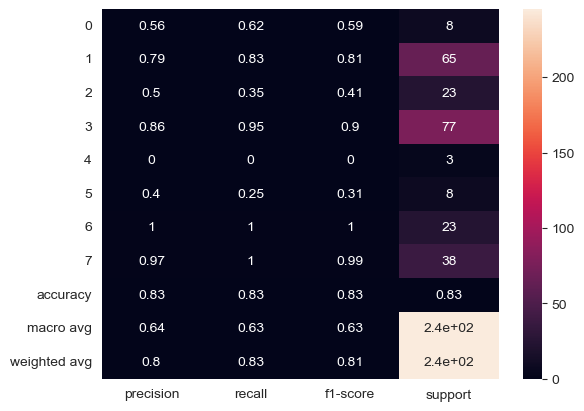

In [248]:
CLFC_report=classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(CLFC_report).T,annot=True)

In [ ]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [255]:
from sklearn.metrics import roc_auc_score
y_proba = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test,y_prob,multi_class='ovo',average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test,y_proba,multi_class='ovo',average='weighted')
macro_roc_auc_ovr = roc_auc_score(y_test,y_prob,multi_class='ovr',average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test,y_proba,multi_class='ovr',average='weighted')
print('One-vs-One ROC AUC scores:\n{:.6f}(macro),\n{:.6f}'
     '(weighted by prevalence)'
      .format(macro_roc_auc_ovo,weighted_roc_auc_ovo))
print('='*40)
print('One-vs-Rest ROC AUC scores:\n{:.6f}(macro),\n{:.6f}'
     '(weighted by prevalence)'
      .format(macro_roc_auc_ovr,weighted_roc_auc_ovr))
                                    

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.926565(macro),
0.941341(weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.946609(macro),
0.967437(weighted by prevalence)


# Saving Model

In [256]:
import joblib

In [257]:
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']